In [1]:
# Lorenz attractor solver
from numpy import array
# %matplotlib widget

# The lorenz attractor velocity
# x' = f(x)
def get_f(a:float=10, b:float=28, c:float=2.667):
    def f(x):
        return array([a*(x[1] - x[0]), x[0]*(b - x[2]) - x[1], x[0]*x[1] - c*x[2]])
    return f

# RK4 integrator
def step(x, f, h:float=1e-2):
    k1 = f(x)
    k2 = f(x + k1*h/2)
    k3 = f(x + k2*h/2)
    k4 = f(x + k3*h)
    return x + (k1 + 2*k2 + 2*k3 + k4)*h/6
    

Text(0.5, 0, 'z')

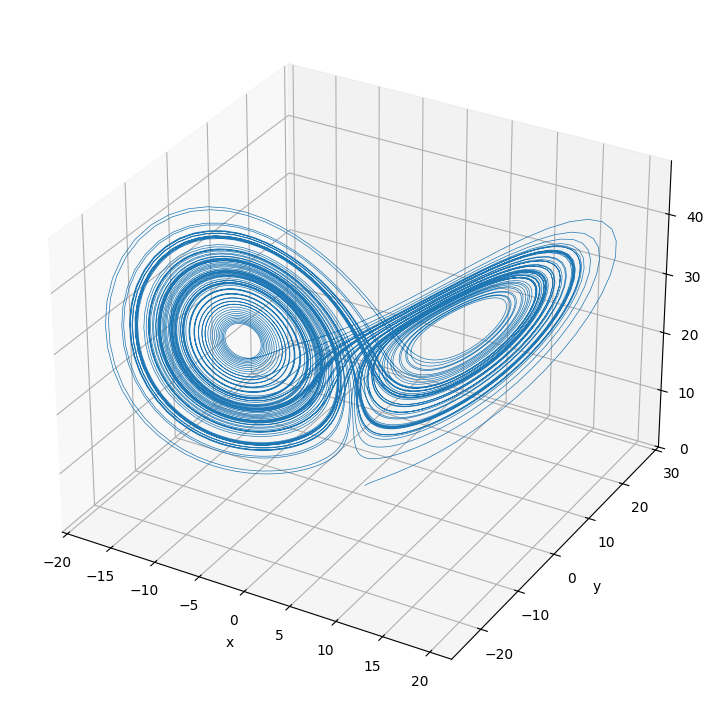

In [2]:
import matplotlib.pyplot as plt

steps   = 10000
a, b, c = 10., 28., 2.667
x       = array([[1.,1.,1.]]*steps, dtype=float)
h       = 1e-2

# Step something
for i in range(steps-1):
    x[i+1] = step(x[i],get_f(a,b,c), h)

# Plotting
fig = plt.figure(figsize=(16,9))
ax  = fig.add_subplot(projection='3d')

ax.plot(*x.T, lw=0.5)
# ax.view_init(elev=0, azim=90)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [3]:
from numpy import linspace

# Ok so let's do something cooler. We will build a bifurcation diagram
def intersections(x0=array([1.,1.,1.]), a=10., b = 28., c = 0.7, h = 1e-2, steps=10000):
    x       = x0
    ints    = []

    for _ in range(steps):
        x = step(x0,get_f(a,b,c),h)
        if x[0]*x0[0] <= 0:
            ints.append([c,x0[1],x0[2]])
        x0 = x

    return ints

def worker(crange):
    a       = 10.
    b       = 28.
    h       = 1e-2
    steps   = 10000

    ints = []
    for c in crange:
        ints += intersections(a=a,b=b,c=c, h=h,steps=steps)
    return ints
    

ints = worker(linspace(0.35,0.65, 100))

Text(0.5, 0, 'z')

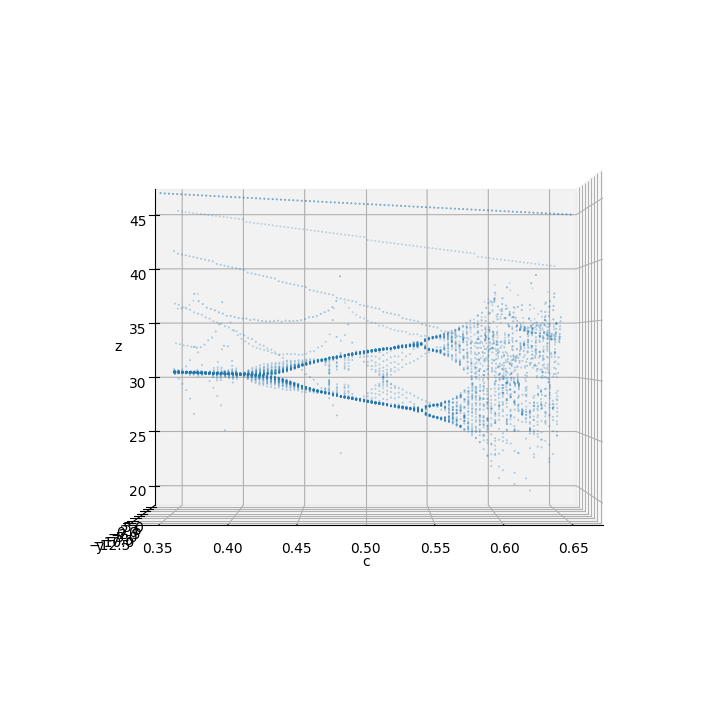

In [4]:
# Plotting
fig = plt.figure(figsize=(16,9))
ax  = fig.add_subplot(projection='3d')

ax.scatter3D(*array(ints).T, s=0.1)
ax.view_init(elev=0, azim=-90)
ax.set_xlabel('c')
ax.set_ylabel('y')
ax.set_zlabel('z')